# **Credit Card Fraud Detection**

## **Introduction**

Credit card fraud poses a significant threat to financial institutions and customers, resulting in substantial financial losses and security concerns. The objective of this project is to develop a machine learning model to detect fraudulent credit card transactions using specific features related to transaction characteristics, such as distance metrics, purchase methods, and purchase price comparisons. By leveraging these features, we aim to build a logistic regression model that can accurately classify transactions as either fraudulent or non-fraudulent. This approach will help in identifying potentially fraudulent activities and mitigating financial risks associated with credit card fraud.

## **Importing Required Libraries:**
First we have to import the required python libraries which are gonna help us analyze and visualize our dataset. After that we will import our dataset as a Pandas dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## **Data Loading and Cleaning**


*   ### **Loading the Dataset**
We begin by loading the dataset into a pandas DataFrame to explore and analyze the data.

In [5]:
df = pd.read_csv("fraud_data.csv")
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
41238,19.837844,4.508499,0.617235,1.0,1.0,0.0,1.0,0.0
41239,36.039140,4.455109,0.366383,1.0,1.0,0.0,1.0,0.0
41240,13.191169,0.247942,2.380462,1.0,0.0,1.0,0.0,0.0
41241,145.179521,5.203671,0.366487,1.0,0.0,0.0,1.0,1.0


*  ### **Checking for Missing Values:**
We check for any missing values in the dataset. Identifying and handling missing data is crucial for building an accurate model.

In [6]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    1
ratio_to_median_purchase_price    1
repeat_retailer                   1
used_chip                         1
used_pin_number                   1
online_order                      1
fraud                             1
dtype: int64

*  ### **Dropping Missing Values:**
As the number of missing values in each column is very small so we drop rows with missing values to ensure that our dataset is clean and free from null entries.

In [7]:
df.dropna(inplace = True)
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
41237,3.220594,3.687526,0.493897,1.0,0.0,1.0,1.0,0.0
41238,19.837844,4.508499,0.617235,1.0,1.0,0.0,1.0,0.0
41239,36.039140,4.455109,0.366383,1.0,1.0,0.0,1.0,0.0
41240,13.191169,0.247942,2.380462,1.0,0.0,1.0,0.0,0.0


In [8]:
df[['repeat_retailer', "used_chip",	"used_pin_number", "online_order", "fraud"]] = df[['repeat_retailer', "used_chip",	"used_pin_number", "online_order", "fraud"]].astype(int)
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

In [9]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


## **Exploratory Data Analysis (EDA)**

*  ### **Summary Statistics:**
We generate summary statistics of the dataset to understand the distribution and central tendency of the features.

In [10]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,41242.000000,41242.000000,41242.000000,41242.000000,41242.000000,41242.000000,41242.000000,41242.000000
mean,26.936940,5.115023,1.801843,0.885238,0.351996,0.102323,0.650453,0.087484
std,66.286331,25.057121,2.683173,0.318738,0.477598,0.303076,0.476833,0.282546
min,0.021322,0.000705,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.907375,0.299326,0.475117,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.038226,1.008806,0.995767,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.940708,3.399941,2.076656,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,1872.446884,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


*  ### **Class Distribution:**
We calculate and display the number of valid and fraudulent transactions to understand the class distribution.

In [11]:
valid_number = df['fraud'].value_counts()[0]
fraudulent_number = df['fraud'].value_counts()[1]
print("Number of Valid Transactions: " + str(valid_number))
print("Number of Fraudulent Transactions: " + str(fraudulent_number))

Number of Valid Transactions: 37634
Number of Fraudulent Transactions: 3608


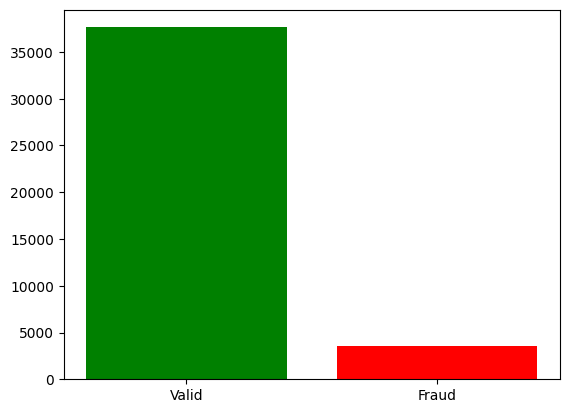

In [12]:
plt.bar(['Valid','Fraud'],[valid_number, fraudulent_number], color = ['green','red'])
plt.show()

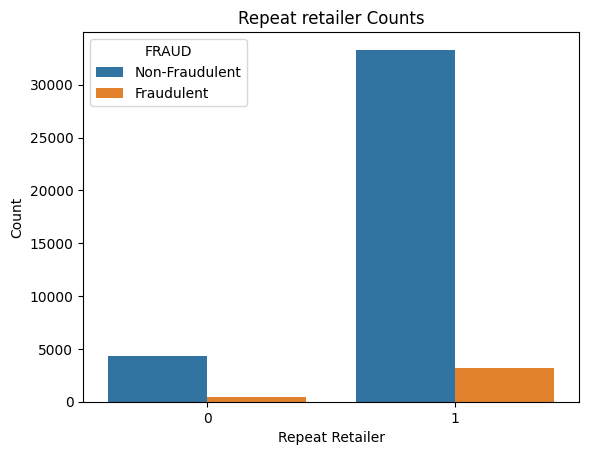

In [13]:
sns.countplot(data=df, x='repeat_retailer', hue='fraud')
plt.title('Repeat retailer Counts')
plt.xlabel('Repeat Retailer')
plt.ylabel('Count')
plt.legend(title='FRAUD', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


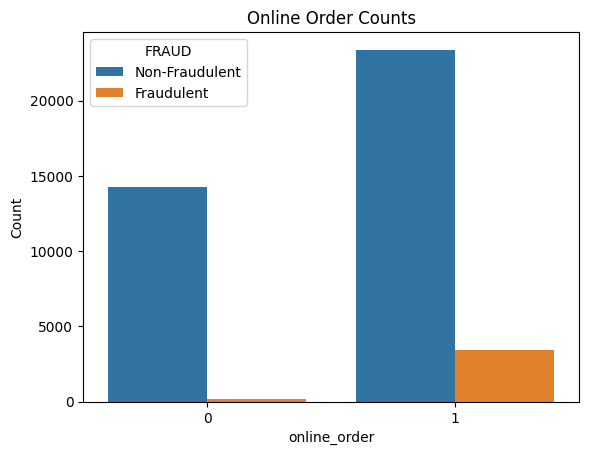

In [14]:
sns.countplot(data=df, x='online_order', hue='fraud')
plt.title('Online Order Counts')
plt.xlabel('online_order')
plt.ylabel('Count')
plt.legend(title='FRAUD', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

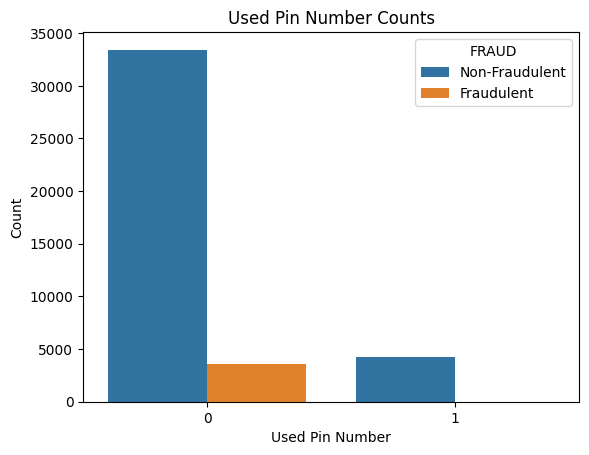

In [15]:
sns.countplot(data=df, x='used_pin_number', hue='fraud')
plt.title('Used Pin Number Counts')
plt.xlabel('Used Pin Number')
plt.ylabel('Count')
plt.legend(title='FRAUD', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

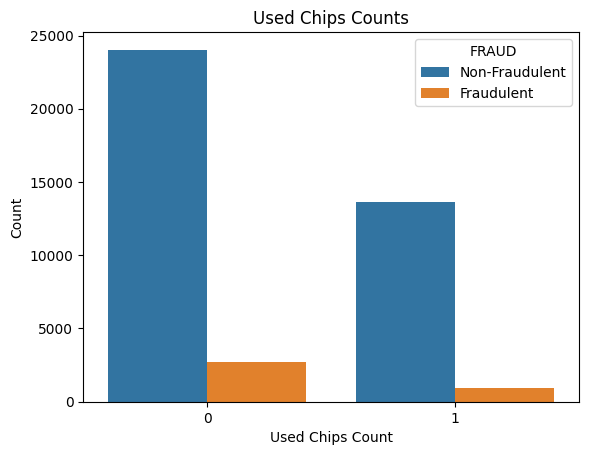

In [16]:
sns.countplot(data=df, x='used_chip', hue='fraud')
plt.title('Used Chips Counts')
plt.xlabel("Used Chips Count")
plt.ylabel('Count')
plt.legend(title='FRAUD', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

*  ### **Correlation Matrix:**
We plot a correlation heatmap to understand the relationships between features and identify any highly correlated features.

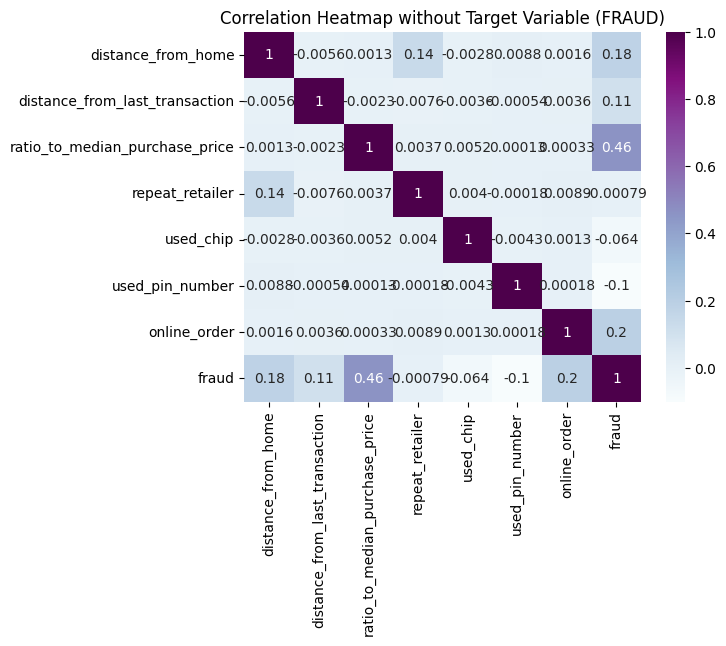

In [17]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Heatmap without Target Variable (FRAUD)')
plt.show()

## **Balancing the Dataset**

*  ### **Class Balancing:**
We address the class imbalance by randomly sampling an equal number of valid transactions to match the number of fraudulent transactions and then we are visualizing the count of valid and fraudulent transactions in the balanced dataset.

In [18]:
df['fraud'].value_counts()

fraud
0    37634
1     3608
Name: count, dtype: int64

In [19]:
Valid = df[df['fraud'] == 0]
Fraudulent = df[df['fraud'] == 1]

In [21]:
valid_sample = Valid.sample(df['fraud'].value_counts()[1])

In [22]:
sampled_df = pd.concat([valid_sample, Fraudulent])

In [23]:
sampled_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
2494,39.551837,7.143371,6.418562,1,1,0,0,0
22060,7.624330,2.418076,0.486647,1,0,0,0,0
21266,2.260554,3.038917,0.604981,1,0,0,0,0
14484,1.221043,0.107223,1.125410,0,0,0,1,0
14104,1.833077,0.296647,1.935780,0,1,0,1,0


In [24]:
sampled_df['fraud'].value_counts()

fraud
0    3608
1    3608
Name: count, dtype: int64

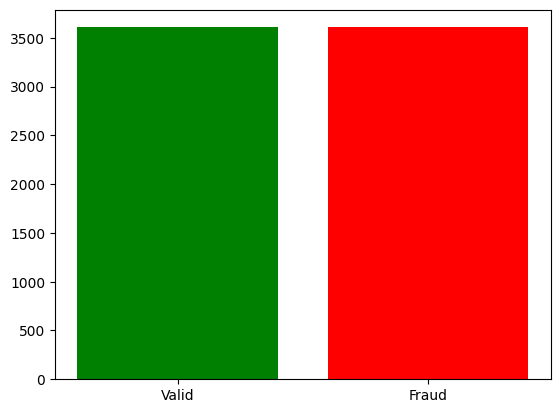

In [25]:
valid_number_sample = sampled_df['fraud'].value_counts()[0]
fraudulent_number_sample = sampled_df['fraud'].value_counts()[1]
plt.bar(['Valid','Fraud'],[valid_number_sample, fraudulent_number_sample], color = ['green','red'])
plt.show()

*  ### **Feature Relationship in Fraudulent Transactions:**
We plot the relationship between distance_from_home and ratio_to_median_purchase_price for fraudulent transactions to identify any significant patterns.

[]

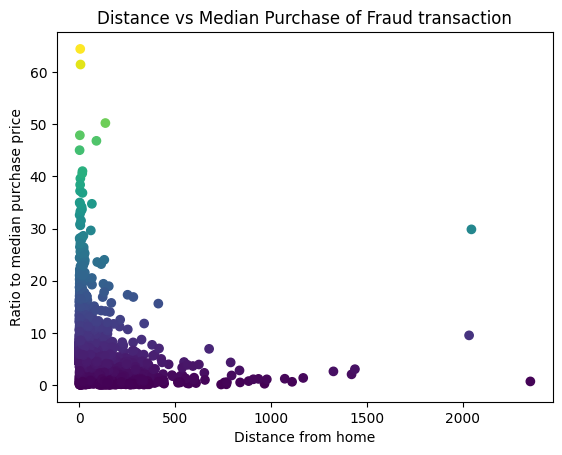

In [26]:
plt.scatter(Fraudulent['distance_from_home'], Fraudulent['ratio_to_median_purchase_price'], c=Fraudulent['ratio_to_median_purchase_price'])
plt.xlabel('Distance from home')
plt.ylabel('Ratio to median purchase price')
plt.title("Distance vs Median Purchase of Fraud transaction")
plt.plot()

*  ### **Mean Feature Values by Fraud Status:**
We calculate and display the mean of each feature for valid and fraudulent transactions to identify any significant differences and make sure the sample we have taken does not change the properties of our data significantly.

In [27]:
df.groupby("fraud").mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0,23.175162,4.294701,1.417787,0.885316,0.361482,0.111734,0.621539
1,66.174951,13.671559,5.807822,0.884424,0.253049,0.004157,0.952051


In [28]:
sampled_df.groupby("fraud").mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0,23.185792,4.629564,1.416765,0.891353,0.367794,0.109756,0.616962
1,66.174951,13.671559,5.807822,0.884424,0.253049,0.004157,0.952051


## **Model Training and Evaluation**

*  ### **Preparing Data for Modeling:**
We separate the features and the target variable, then split the data into training and testing sets.

In [29]:
features = sampled_df.drop(columns = "fraud", axis = 1)
target = sampled_df['fraud']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify = target, random_state=21)

*  ### **Training Logistic Regression Model:**
We initialize and train a logistic regression model using the training data

In [30]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_test_pred_log = log_model.predict(X_test)
y_train_pred_log = log_model.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Making Predictions and Evaluating the Model:**

We make predictions on the test set and evaluate the model's performance using accuracy and mean squared error.

In [31]:
score_train_log = accuracy_score(y_train, y_train_pred_log)
score_test_log = accuracy_score(y_test, y_test_pred_log)
print("Accuracy Score for Train Data:", score_train_log)
print("Accuracy Score for Test Data:", score_test_log)

Accuracy Score for Train Data: 0.9407484407484408
Accuracy Score for Test Data: 0.932825484764543


In [32]:
mse_train_log = MSE(y_train, y_train_pred_log)
mse_test_log = MSE(y_test, y_test_pred_log)

print("Mean Squared Error for Train Data:", mse_train_log)
print("Mean Squared Error for Test Data:", mse_test_log)

Mean Squared Error for Train Data: 0.059251559251559255
Mean Squared Error for Test Data: 0.06717451523545706


## **Conclusion**
In this project, we aimed to develop a machine learning model to detect fraudulent credit card transactions using various transaction characteristics. The process began with loading and cleaning the dataset, ensuring it was free of missing values and ready for analysis. We then explored the data to understand the distribution and central tendencies of features such as distance metrics, purchase methods, and purchase price comparisons.

Our exploratory data analysis revealed several key insights. The dataset was significantly imbalanced, with a much higher number of valid transactions compared to fraudulent ones. Visualization techniques, including count plots and scatter plots, helped us identify patterns in the data. For instance, fraudulent transactions tended to have higher average distances from home and last transaction, higher ratios to median purchase price, and were more frequently online orders.

To address the class imbalance, we employed undersampling of the valid transactions to create a balanced dataset. This step was crucial to prevent the model from being biased towards the majority class. We then trained a logistic regression model using the balanced dataset. The model was evaluated based on its accuracy and mean squared error, both of which indicated strong performance.

Our model achieved high accuracy on both the training and test data, demonstrating its effectiveness in classifying transactions as fraudulent or non-fraudulent. Specifically, the logistic regression model showed that features like transaction distances and purchase methods are significant indicators of fraudulent activity.

Overall, the project successfully demonstrated the potential of using machine learning for credit card fraud detection. Future improvements could involve exploring more advanced algorithms, incorporating additional features, and using more sophisticated techniques to handle class imbalance. These steps could further enhance the model's accuracy and reliability in real-world applications, contributing to the mitigation of financial risks associated with credit card fraud.